##                                        FAKE NEWS CLASSIFIER 

IMPORTING ALL NECESSARY LIBRARIES

In [17]:
import numpy as np
import pandas as pd
from matplotlib.pylab import plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import nltk
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tqdm import tqdm
from nltk.stem import WordNetLemmatizer
from tqdm import tqdm
from sklearn.linear_model import LogisticRegression
# Download NLTK resources
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from matplotlib.pylab import plt

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/umakantapatra/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/umakantapatra/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


READING THE CSV FILE INTO A PANDAS DATAFRAME

In [18]:
df = pd.read_csv('WELFake_Dataset.csv')
df.head(15)

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
5,5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1
6,6,DR BEN CARSON TARGETED BY THE IRS: “I never ha...,DR. BEN CARSON TELLS THE STORY OF WHAT HAPPENE...,1
7,7,HOUSE INTEL CHAIR On Trump-Russia Fake Story: ...,,1
8,8,Sports Bar Owner Bans NFL Games…Will Show Only...,"The owner of the Ringling Bar, located south o...",1
9,9,Latest Pipeline Leak Underscores Dangers Of Da...,"FILE – In this Sept. 15, 2005 file photo, the ...",1


We have 3 columns, namely Title, Text and Lable. The unnamed column for index can be dropped.

## EXPLORATORY DATA ANALYSIS

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  72134 non-null  int64 
 1   title       71576 non-null  object
 2   text        72095 non-null  object
 3   label       72134 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.2+ MB


From the above info we can see that both the Text and Title columns contain some null values in their fields. We can either drop them, change them to an empty string or impute them. Since the size of dataset is large enough compared to the number of null values, dropping the null values will not cause any loss of information.

In [20]:
df.shape

(72134, 4)

In [21]:
df.isna().sum()

Unnamed: 0      0
title         558
text           39
label           0
dtype: int64

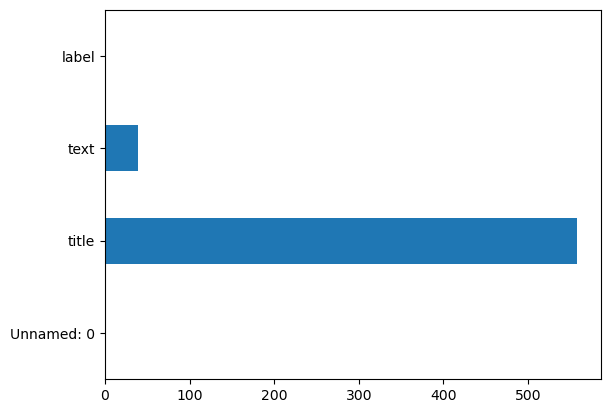

In [22]:
df.isnull().sum().plot(kind="barh")
plt.show()

In [23]:
df.dropna(inplace=True) #dropping the null values in every column

In [7]:
df.shape


(71537, 4)

After dropping the null values, the size of our dataset reduced from 72134 TO 71537.

In [8]:
df.head(15)

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
5,5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1
6,6,DR BEN CARSON TARGETED BY THE IRS: “I never ha...,DR. BEN CARSON TELLS THE STORY OF WHAT HAPPENE...,1
7,7,HOUSE INTEL CHAIR On Trump-Russia Fake Story: ...,,1
8,8,Sports Bar Owner Bans NFL Games…Will Show Only...,"The owner of the Ringling Bar, located south o...",1
9,9,Latest Pipeline Leak Underscores Dangers Of Da...,"FILE – In this Sept. 15, 2005 file photo, the ...",1
10,10,GOP Senator Just Smacked Down The Most Puncha...,The most punchable Alt-Right Nazi on the inter...,1


In [9]:
df.drop(['Unnamed: 0'],axis=1,inplace= True)

Next we drop the unnamed column.

In [10]:

df.head(15)

,title,text,label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1
6,DR BEN CARSON TARGETED BY THE IRS: “I never ha...,DR. BEN CARSON TELLS THE STORY OF WHAT HAPPENE...,1
7,HOUSE INTEL CHAIR On Trump-Russia Fake Story: ...,,1
8,Sports Bar Owner Bans NFL Games…Will Show Only...,"The owner of the Ringling Bar, located south o...",1
9,Latest Pipeline Leak Underscores Dangers Of Da...,"FILE – In this Sept. 15, 2005 file photo, the ...",1
10,GOP Senator Just Smacked Down The Most Puncha...,The most punchable Alt-Right Nazi on the inter...,1


Text(0.5, 1.0, 'Distribution of Fake/Real News')

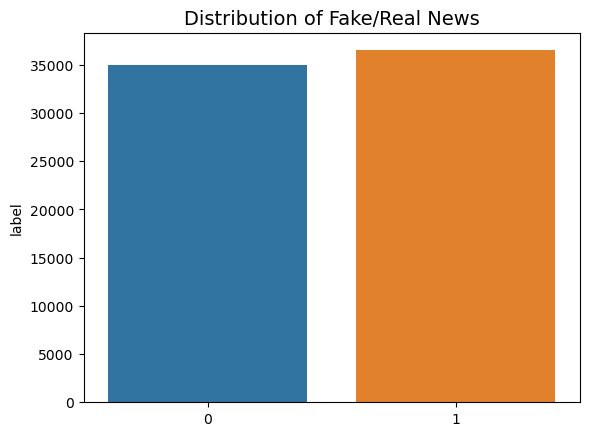

In [24]:
class_names = ['fake', 'real'] 
label_count = df.label.value_counts()
sns.barplot(x=label_count.index, y=label_count)
plt.title('Distribution of Fake/Real News',fontsize =14)

## DATA PRE-PROCESSING

We can perform the concatenation of both the text fields and preprocess it remove stop words and lemmatize the words according to the NLTK wordnet library.
This will help us provide insights of patterns present in both the title as well as the text fields of dataset.
In dataset with image data, a multimodal sentimental analysis can be performed by grounding the text component to different semantic areas in the image component. This will help judge the authenticty of the article better. But since the dataset is restricted to text data, we can perform text analysis to determine whether it is fake or real news.

Text analysis requires preprocessing steps: removal of characters which are not alphanumeric, maintaining type casting of alphabets to either all lower or all upper, stemming and lemmitization and removing stop words.

In [11]:
df['combined_text'] = df['title'] + ' ' + df['text']

def preprocess_text(text):
    
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    words = text.split()
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)

tqdm.pandas()
df['processed_text'] = df['combined_text'].progress_apply(preprocess_text)

100%|████████████████████████████████████| 71537/71537 [02:11<00:00, 544.62it/s]


SPLITTING DATASET INTO TEST AND TRAIN AND VECTORIZING THE TRAIN DATA TO TRAIN THE MODEL

In [12]:
X_train, X_test, y_train, y_test = train_test_split(df['processed_text'], df['label'], test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(max_features=5000, stop_words='english', ngram_range=(1, 2))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

## WORD CLOUD FOR FAKE DATA

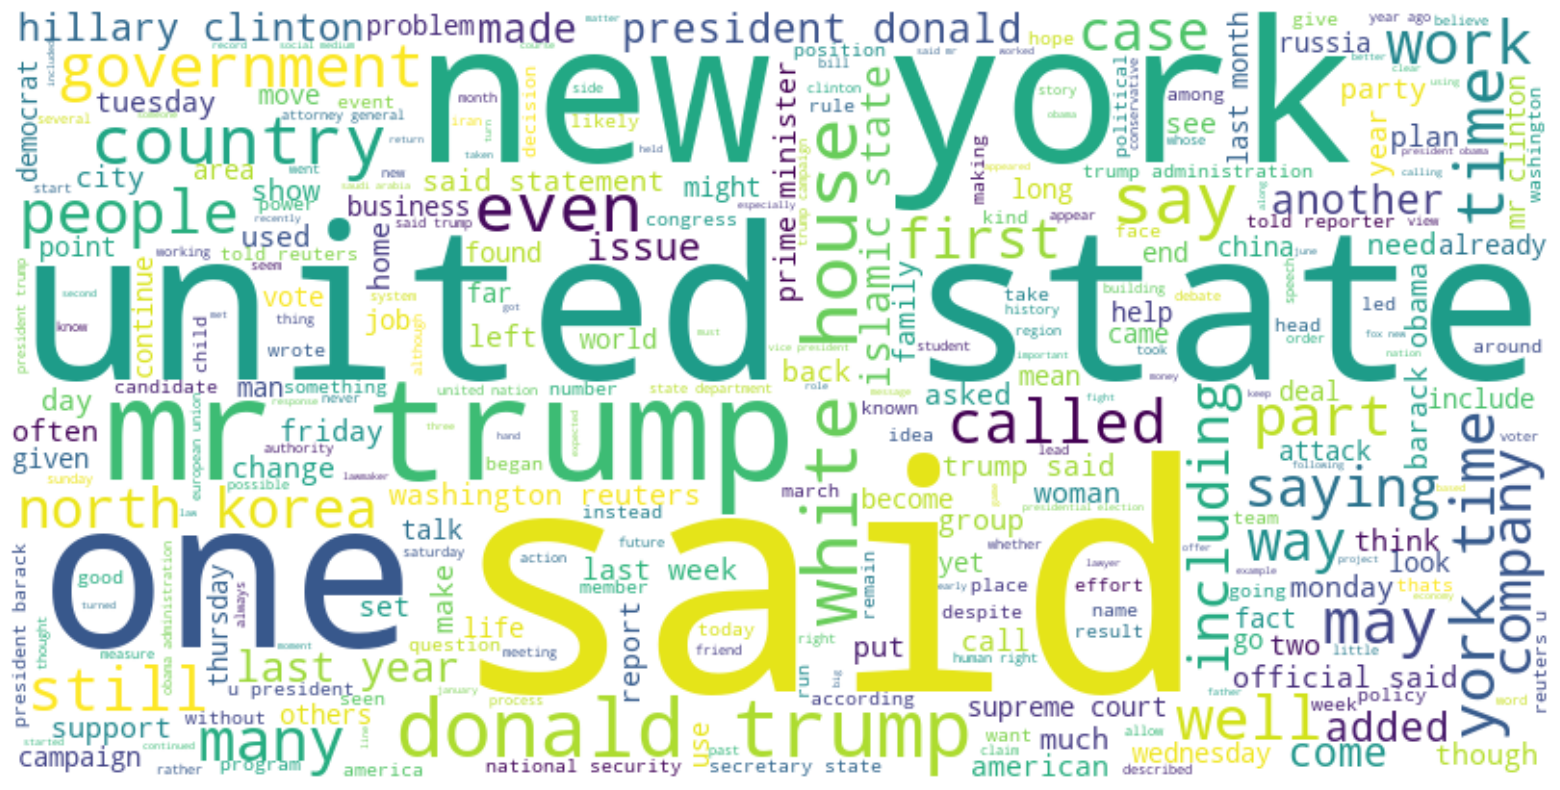

In [28]:
from wordcloud import WordCloud
fake_news = X_train[y_train == 0]
real_news = X_train[y_train == 1]
fake_texts = ' '.join(text for text in fake_news)
wordcloud = WordCloud(
    background_color='white', 
    max_words=300,
    width=800, 
    height=400,
).generate(fake_texts)

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## WORD CLOUD FOR REAL DATA

<function matplotlib.pyplot.show(close=None, block=None)>

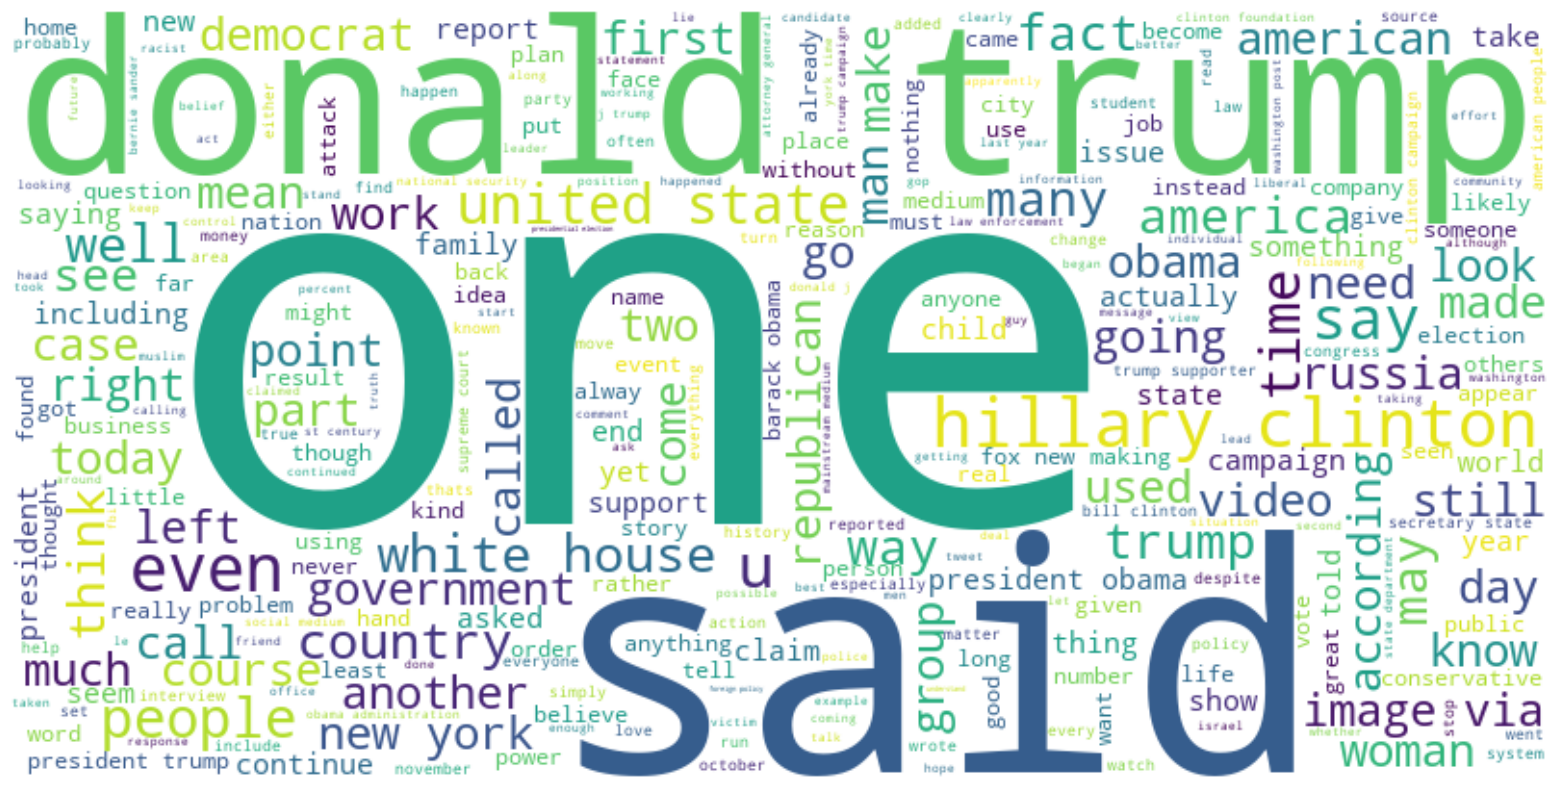

In [29]:
real_texts = ' '.join(text for text in real_news)
wordcloud = WordCloud(
    background_color='white', 
    max_words=300,
    width=800, 
    height=400,
).generate(real_texts)

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show

## MODEL TRAINING AND PREDICTION

NAIVE BAYES CLASSIFIER

In [43]:
classifier = MultinomialNB()
classifier.fit(X_train_tfidf, y_train)

y_pred = classifier.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

Accuracy: 0.8524601621470506
Confusion Matrix:
[[5841 1240]
 [ 871 6356]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.82      0.85      7081
           1       0.84      0.88      0.86      7227

    accuracy                           0.85     14308
   macro avg       0.85      0.85      0.85     14308
weighted avg       0.85      0.85      0.85     14308



/Users/umakantapatra/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


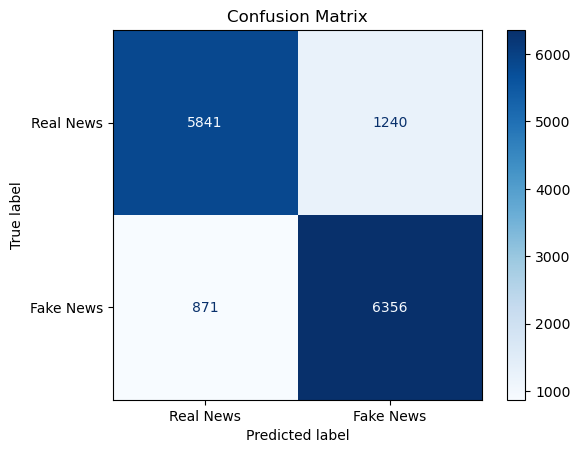

/Users/umakantapatra/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


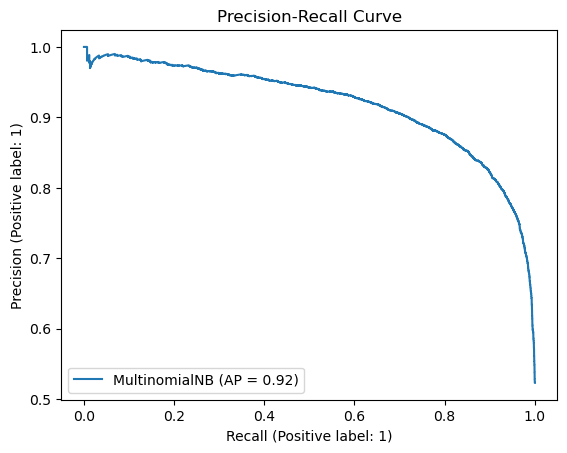

In [44]:
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve
disp = plot_confusion_matrix(classifier, X_test_tfidf, y_test, cmap=plt.cm.Blues, display_labels=['Real News', 'Fake News'])
disp.ax_.set_title('Confusion Matrix')
plt.show()

disp = plot_precision_recall_curve(classifier, X_test_tfidf, y_test)
disp.ax_.set_title('Precision-Recall Curve')
plt.show()

LOGISTIC REGRESSION CLASSIFIER

In [16]:
logreg_classifier = LogisticRegression(max_iter=100)

# Train the classifier
logreg_classifier.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred = logreg_classifier.predict(X_test_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")


Accuracy: 0.9468129717640481
Confusion Matrix:
[[6650  431]
 [ 330 6897]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.95      7081
           1       0.94      0.95      0.95      7227

    accuracy                           0.95     14308
   macro avg       0.95      0.95      0.95     14308
weighted avg       0.95      0.95      0.95     14308



/Users/umakantapatra/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


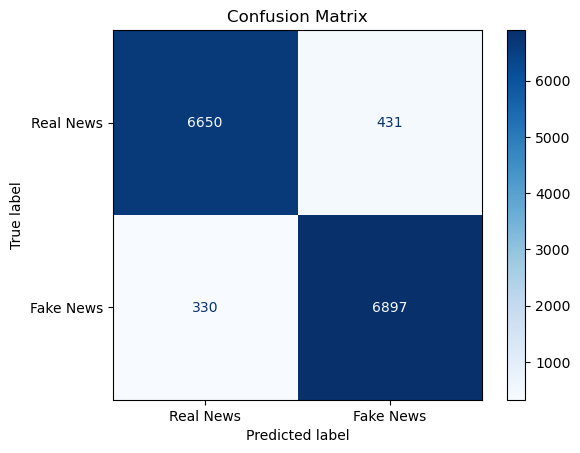

/Users/umakantapatra/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


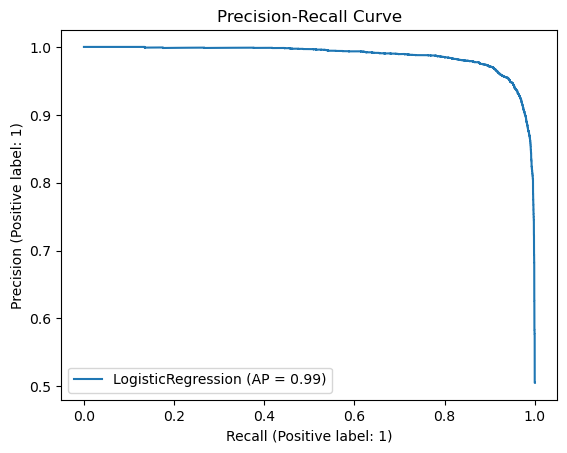

In [32]:
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve
disp = plot_confusion_matrix(logreg_classifier, X_test_tfidf, y_test, cmap=plt.cm.Blues, display_labels=['Real News', 'Fake News'])
disp.ax_.set_title('Confusion Matrix')
plt.show()

disp = plot_precision_recall_curve(logreg_classifier, X_test_tfidf, y_test)
disp.ax_.set_title('Precision-Recall Curve')
plt.show()

SUPPORT VECTOR MACHINE CLASSIFIER

In [45]:
from sklearn.svm import SVC
svc_classifier = SVC(kernel='linear')  # You can experiment with different kernels like 'linear', 'rbf', etc.

# Fit the classifier
svc_classifier.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred = svc_classifier.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

Accuracy: 0.952264467430808
Confusion Matrix:
[[6699  382]
 [ 301 6926]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      7081
           1       0.95      0.96      0.95      7227

    accuracy                           0.95     14308
   macro avg       0.95      0.95      0.95     14308
weighted avg       0.95      0.95      0.95     14308



/Users/umakantapatra/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


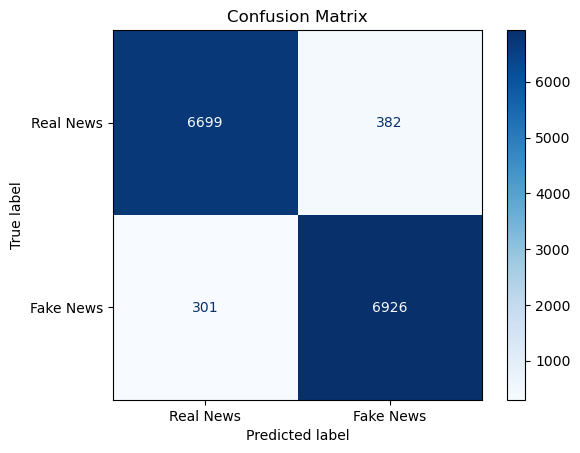

/Users/umakantapatra/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


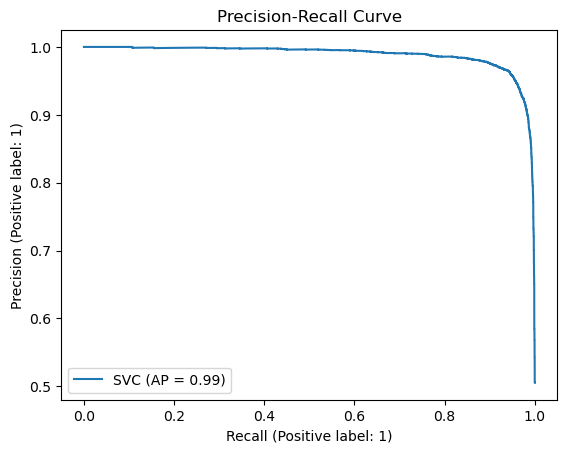

In [46]:
disp = plot_confusion_matrix(svc_classifier, X_test_tfidf, y_test, cmap=plt.cm.Blues, display_labels=['Real News', 'Fake News'])
disp.ax_.set_title('Confusion Matrix')
plt.show()

disp = plot_precision_recall_curve(svc_classifier, X_test_tfidf, y_test)
disp.ax_.set_title('Precision-Recall Curve')
plt.show()

In [ ]:
LONG SHORT TERM MEMORY NEURAL MODEL

!pip install tensorflow

import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Model, Sequential
from keras.layers import GRU, Input, Dense, Activation, RepeatVector, Bidirectional, LSTM, Dropout, Embedding
from keras.layers import Embedding
from sklearn.model_selection import train_test_split 
from keras.losses import sparse_categorical_crossentropy
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.callbacks import EarlyStopping

MAX_LEN = 512
tok = Tokenizer()
tok.fit_on_texts(X_train)

sequences = tok.texts_to_sequences(X_train)
test_sequences = tok.texts_to_sequences(X_test)
X_train_seq = sequence.pad_sequences(sequences,maxlen=MAX_LEN)
X_test_seq = sequence.pad_sequences(test_sequences,maxlen=MAX_LEN)
model = tf.keras.Sequential([
    Input(name='inputs',shape=[MAX_LEN]),
    Embedding(len(tok.word_index), 128),
    Bidirectional(tf.keras.layers.LSTM(128,  return_sequences=True)),
    Bidirectional(tf.keras.layers.LSTM(64)),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

model.summary()
WARNING:tensorflow:From C:\Users\milin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\backend.py:1398: The name tf.executing_eagerly_outside_functions is deprecated. Please use tf.compat.v1.executing_eagerly_outside_functions instead.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
=================================================================
 embedding (Embedding)       (None, 512, 128)          36570624  
                                                                 
 bidirectional (Bidirection  (None, 512, 256)          263168    
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 128)               164352    
 onal)                                                           
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
=================================================================
Total params: 37006465 (141.17 MB)
Trainable params: 37006465 (141.17 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
history = model.fit(X_train_seq, y_train, epochs=5, callbacks=[EarlyStopping(monitor='val_accuracy',mode='max', patience=3, verbose=False,restore_best_weights=True)])
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

SUMMARY:
SVM appears to be the most effective model for fake news classification task, achieving the highest accuracy.
Logistic Regression also performs well, and its simplicity makes it a good choice if interpretability is important.
Naive Bayes, while having a lower accuracy in this case, can still be a viable option, especially in scenarios where computational efficiency is crucial.